1. Data Pre-processing

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Phone price dataset.csv']))  # change name if needed


Saving Phone price dataset.csv to Phone price dataset.csv


In [ ]:
# ---------------------------
# Mobile Price Dataset - Preprocessing + Random Forest Model
# ---------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load Dataset (after uploading with files.upload)
data = pd.read_csv("Phone price dataset.csv")   # change name if needed

print("First few rows of raw data:")
print(data.head())

# 2. Data Cleaning
data["price"] = data["price"].replace('[^0-9]', '', regex=True).astype(float)
data["RAM"] = data["memory"].str.extract(r'(\d+)\s?GB RAM').astype(float)
data["Storage"] = data["memory"].str.extract(r'(\d+)\s?GB inbuilt').astype(float)
data["Battery"] = data["baterry"].str.extract(r'(\d+)').astype(float)
data["Display_inches"] = data["display"].str.extract(r'(\d+\.?\d*)').astype(float)
data["Main_Camera_MP"] = data["camara"].str.extract(r'(\d+)\?MP').astype(float)

# Drop messy text columns
data = data.drop(columns=["Unnamed: 0", "memory", "baterry", "display", "camara"])

print("\nAfter cleaning:")
print(data.head())

# 3. Features & Target
num_features = ["RAM", "Storage", "Battery", "Display_inches", "Main_Camera_MP"]
cat_features = ["name", "sim", "processor", "version"]

X = data[num_features + cat_features]
y = data["price"]

# 4. Preprocessing Pipelines
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)
preprocessor.set_output(transform="pandas")

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# 5. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# 6. Model Training (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 7. Model Evaluation
print("\n🌲 Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 8. Example Predictions
print("\n🔮 Example Predictions (first 5):")
print("Actual:", y_test.head().values)
print("Predicted:", y_pred[:5])


First few rows of raw data:
   Unnamed: 0                                     name    price  \
0           0                OnePlus Nord CE 2 Lite 5G  ?18,999   
1           1                    Samsung Galaxy A14 5G  ?16,499   
2           2  Samsung Galaxy F23 5G (6GB RAM + 128GB)  ?16,999   
3           3                     Motorola Moto G62 5G  ?14,999   
4           4                       Realme 10 Pro Plus  ?24,999   

                                       sim  \
0       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                        processor                    memory  \
0    Snapdragon 695, Octa Core, 2.2?GHz Processor  6?GB RAM, 128?GB inbuilt   
1       Exynos 1330, Octa Core, 2.4?GHz Processor   4?GB RAM, 64?GB inbuilt   
2  Snapdragon  750G, Octa Core, 2.2?GHz Processor  6?GB

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['RAM' 'Storage']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



🌲 Random Forest Performance:
MAE: 4656.663970588235
R² Score: 0.8454626758625462

🔮 Example Predictions (first 5):
Actual: [ 7999.  8390. 32900. 27999. 10999.]
Predicted: [ 8141.2   8952.58 29810.84 21223.15  9635.22]


2. Simple Linear Regression



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = { 'x':[1,2,3,4,5],
'y':[2,4,5,4,5] }
df = pd.DataFrame(data)
X = df[['x']]
Y = df[['y']]
model = LinearRegression()
model.fit(X,Y)
y_pred = model.predict(X)
print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)

Slope(m): [0.6]
Intercept(c): [2.2]


Saving Phone price dataset.csv to Phone price dataset (3).csv
✅ First few rows of cleaned dataset:
   Display_inches    price
0            6.59  18999.0
1            6.60  16499.0
2            6.60  16999.0
3            6.55  14999.0
4            6.70  24999.0

📊 Regression Results:
Slope (m): [5008.62055591]
Intercept (c): -8134.1303234222505
Equation: Price = 5008.62 × Display_inches + -8134.13


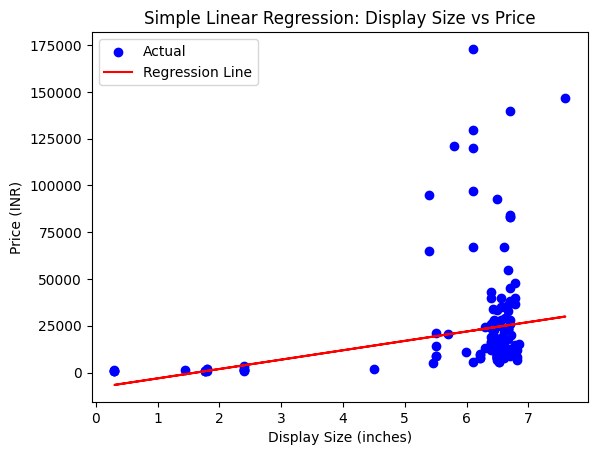

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files
import io, re

# ---------------------------
# Upload dataset
# ---------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# ---------------------------
# Data Cleaning
# ---------------------------

# Clean price (remove ₹, ?, commas etc.)
data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)

# Extract display size (e.g. "6.59 inches" → 6.59)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)

# Drop missing values
data = data[['Display_inches', 'price']].dropna()

print("✅ First few rows of cleaned dataset:")
print(data.head())

# ---------------------------
# Features & Target
# ---------------------------
X = data[['Display_inches']]
y = data['price']

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Train Linear Regression
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------
# Results
# ---------------------------
print("\n📊 Regression Results:")
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)
print(f"Equation: Price = {model.coef_[0]:.2f} × Display_inches + {model.intercept_:.2f}")

# ---------------------------
# Plot
# ---------------------------
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Display Size (inches)')
plt.ylabel('Price (INR)')
plt.title('Simple Linear Regression: Display Size vs Price')
plt.legend()
plt.show()


3. Cross Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from google.colab import files
import io

# ---------------------------
# Upload dataset
# ---------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# ---------------------------
# Data Cleaning
# ---------------------------
data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data = data[['Display_inches', 'price']].dropna()

# ---------------------------
# Features & Target
# ---------------------------
X = data[['Display_inches']]
y = data['price']

# ---------------------------
# Define Regressors
# ---------------------------
reg1 = DecisionTreeRegressor(random_state=42)
reg2 = LinearRegression()

# ---------------------------
# K-Fold Cross Validation
# ---------------------------
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

scores1 = cross_val_score(reg1, X, y, cv=k_folds, scoring='r2')
scores2 = cross_val_score(reg2, X, y, cv=k_folds, scoring='r2')

# ---------------------------
# Results
# ---------------------------
print("Decision Tree CV Scores: ", scores1)
print("Linear Regression CV Scores: ", scores2)
print("Average Decision Tree CV Score: ", scores1.mean())
print("Average Linear Regression CV Score: ", scores2.mean())
print("Number of CV Scores used in Average: ", len(scores1))
print("Number of CV Scores used in Average: ", len(scores2))


Saving Phone price dataset.csv to Phone price dataset (4).csv
Decision Tree CV Scores:  [0.54768127 0.42512517 0.18763809 0.49815361 0.13708299 0.45555074
 0.48947384 0.42749233 0.31131196 0.23204434]
Linear Regression CV Scores:  [0.05095002 0.04309177 0.03913247 0.06552525 0.04282551 0.05340764
 0.06933597 0.16004163 0.04570276 0.04652514]
Average Decision Tree CV Score:  0.3711554348085271
Average Linear Regression CV Score:  0.061653816576256085
Number of CV Scores used in Average:  10
Number of CV Scores used in Average:  10


4. Performance Metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import io, re

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data['RAM'] = data['memory'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['memory'].str.extract(r'(\d+)\?GB').astype(float)
data['Battery'] = data['baterry'].str.extract(r'(\d+)').astype(float)
data['Main_Camera_MP'] = data['camara'].str.extract(r'(\d+)\?MP').astype(float)

features = ['RAM','Storage','Battery','Display_inches','Main_Camera_MP']
data = data[features + ['price']].dropna()
print(data.head())

X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_dt_pred)
r2_dt = r2_score(y_test, y_dt_pred)
print("Decision Tree Regressor MSE:", mse_dt)
print("Decision Tree Regressor R2:", r2_dt)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)


Saving Phone price dataset.csv to Phone price dataset (5).csv
   RAM  Storage  Battery  Display_inches  Main_Camera_MP    price
0  6.0      6.0   5000.0            6.59            64.0  18999.0
1  4.0      4.0   5000.0            6.60            50.0  16499.0
2  6.0      6.0   5000.0            6.60            50.0  16999.0
3  6.0      6.0   5000.0            6.55            50.0  14999.0
4  6.0      6.0   5000.0            6.70           108.0  24999.0
Decision Tree Regressor MSE: 83484486.70624799
Decision Tree Regressor R2: 0.882422020462648
Linear Regression MSE: 654641860.0647731
Linear Regression R2: 0.07801472748074745


5. Multiple Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import io, re

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data['RAM'] = data['memory'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['memory'].str.extract(r'(\d+)\?GB').astype(float)
data['Battery'] = data['baterry'].str.extract(r'(\d+)').astype(float)
data['Main_Camera_MP'] = data['camara'].str.extract(r'(\d+)\?MP').astype(float)

features = ['RAM','Storage','Battery','Display_inches','Main_Camera_MP']
data = data[features + ['price']].dropna()
print(data.head())

X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lrr = LinearRegression()
lrr.fit(X_train, y_train)
y_lrr_pred = lrr.predict(X_test)

mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)


Saving Phone price dataset.csv to Phone price dataset (6).csv
   RAM  Storage  Battery  Display_inches  Main_Camera_MP    price
0  6.0      6.0   5000.0            6.59            64.0  18999.0
1  4.0      4.0   5000.0            6.60            50.0  16499.0
2  6.0      6.0   5000.0            6.60            50.0  16999.0
3  6.0      6.0   5000.0            6.55            50.0  14999.0
4  6.0      6.0   5000.0            6.70           108.0  24999.0
Linear Regression MSE: 25004686418.385258
Linear Regression R2: -27.039322228225572


6. Logistic Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files
import io, re

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data['RAM'] = data['memory'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['memory'].str.extract(r'(\d+)\?GB').astype(float)
data['Battery'] = data['baterry'].str.extract(r'(\d+)').astype(float)
data['Main_Camera_MP'] = data['camara'].str.extract(r'(\d+)\?MP').astype(float)

features = ['RAM','Storage','Battery','Display_inches','Main_Camera_MP']
data = data[features + ['price']].dropna()

# Convert price into 3 categories: 0=cheap, 1=mid, 2=expensive
data['price_category'] = pd.qcut(data['price'], q=3, labels=[0,1,2])

X = data[features]
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print("y_test shape:", y_test.shape)
print("y_lr_pred shape:", y_lr_pred.shape)

accuracy_lr = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", accuracy_lr)


Saving Phone price dataset.csv to Phone price dataset (7).csv
y_test shape: (167,)
y_lr_pred shape: (167,)
Logistic Regression Accuracy: 0.7065868263473054


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7. Decision_Tree

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
import io, re

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data['RAM'] = data['memory'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['memory'].str.extract(r'(\d+)\?GB').astype(float)
data['Battery'] = data['baterry'].str.extract(r'(\d+)').astype(float)
data['Main_Camera_MP'] = data['camara'].str.extract(r'(\d+)\?MP').astype(float)

features = ['RAM','Storage','Battery','Display_inches','Main_Camera_MP']
data = data[features + ['price']].dropna()

# Convert price into 3 categories: 0=cheap, 1=mid, 2=expensive
data['price_category'] = pd.qcut(data['price'], q=3, labels=[0,1,2])

X = data[features]
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

print("y_test shape:", y_test.shape)
print("y_dt_pred shape:", y_dt_pred.shape)

accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Accuracy:", accuracy_dt)


Saving Phone price dataset.csv to Phone price dataset (8).csv
y_test shape: (167,)
y_dt_pred shape: (167,)
Decision Tree Accuracy: 0.7065868263473054


8. McNemar’s test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.contingency_tables import mcnemar
from google.colab import files
import io, re

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data['price'] = data['price'].replace('[^0-9]', '', regex=True).astype(float)
data['Display_inches'] = data['display'].str.extract(r'(\d+\.\d+)').astype(float)
data['RAM'] = data['memory'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['memory'].str.extract(r'(\d+)\?GB').astype(float)
data['Battery'] = data['baterry'].str.extract(r'(\d+)').astype(float)
data['Main_Camera_MP'] = data['camara'].str.extract(r'(\d+)\?MP').astype(float)

features = ['RAM','Storage','Battery','Display_inches','Main_Camera_MP']
data = data[features + ['price']].dropna()

data['price_category'] = pd.qcut(data['price'], q=3, labels=[0,1,2])

X = data[features]
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_lr_pred))

table = [[0,0],[0,0]]
for i in range(len(y_test)):
    if y_test.iloc[i] == y_dt_pred[i] and y_test.iloc[i] != y_lr_pred[i]:
        table[0][1] += 1
    elif y_test.iloc[i] != y_dt_pred[i] and y_test.iloc[i] == y_lr_pred[i]:
        table[1][0] += 1

for i in range(len(y_test)):
    if y_test.iloc[i] == y_dt_pred[i] and y_test.iloc[i] == y_lr_pred[i]:
        table[0][0] += 1
    elif y_test.iloc[i] != y_dt_pred[i] and y_test.iloc[i] != y_lr_pred[i]:
        table[1][1] += 1

print("Contingency Table (McNemar):", table)
result = mcnemar(table, exact=True)
print("McNemar’s Test Statistic:", result.statistic)
print("McNemar’s Test p-value:", result.pvalue)
if result.pvalue < 0.05:
    print("Significant difference between models (reject H0)")
else:
    print("No significant difference between models (fail to reject H0)")


Saving Phone price dataset.csv to Phone price dataset (9).csv
Decision Tree Accuracy: 0.7065868263473054
Logistic Regression Accuracy: 0.7065868263473054
Contingency Table (McNemar): [[95, 23], [23, 26]]
McNemar’s Test Statistic: 23.0
McNemar’s Test p-value: 1.0
No significant difference between models (fail to reject H0)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
